In [ ]:
!pip install jsonformer

  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0


In [ ]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
!pip install transformers==4.48.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


In [ ]:
!pip install torch==2.5.1 torchvision==0.20.1

  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached triton-3.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import login
login(token="")

In [ ]:
#part one
def run_starcoder_analysis(
    csv_input_path: str,
    csv_output_path: str,
    model_name: str = "bigcode/starcoder2-7b"
):
    import pandas as pd
    import torch
    import json
    import csv
    import gc
    import sys
    from transformers import AutoModelForCausalLM, AutoTokenizer
    from jsonformer import Jsonformer

    # Mount Google Drive
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CSV
    df = pd.read_csv(csv_input_path)
    df.columns = df.columns.str.replace('.', '_')
    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    tokenizer.add_eos_token = True
    if '<pad>' not in tokenizer.get_vocab():
        tokenizer.add_special_tokens({"pad_token": "<pad>"})
    model.resize_token_embeddings(len(tokenizer))
    model.config.pad_token_id = tokenizer.pad_token_id

    if tokenizer.eos_token is None:
        tokenizer.eos_token = "[EOS]"

    # Define JSON Schema
    json_schema = {
        "type": "object",
        "properties": {
            "issues_found": {
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "misconfigured_snippet": {"type": "string"},
                        "related_cwe": {"type": "string"},
                    }
                }
            },
            "misconfiguration_label": {"type": "string"}
        }
    }

    def analyze_misconfiguration(code_snippet):
        prompt = f"""
        You are a security expert specializing in Puppet configuration security.
        Your task is to analyze the following Puppet code and identify only critical security misconfigurations issues that could lead to vulnerabilities and have a real CWE ID.
        Focus only on the available code and avoid making assumptions about unavailable details
        Puppet Script to Analyze:
        ```puppet
        {code_snippet}
        ```

        Response Format:
        Return the response in **valid JSON format**:

        - If there are critical issues provide unique misconfigured code:
        ```json
        {{
          "issues_found": [
            {{
              "misconfigured_snippet": "<actual misconfigured code snippet>",
              "related_cwe": "<CWE-ID>"
            }}
          ],
          "misconfiguration_label": 1
        }}
        ```

        - If there are NO critical issues:
        ```json
        {{
          "issues_found": [],
          "misconfiguration_label": 0
        }}
        ```

        Instructions:
        - Only list real misconfigurations tied to known CWE IDs.
        - **Do NOT** insert `"N/A"` entries into `issues_found`.
        - Do not include syntax errors
        - If no critical misconfiguration is found, the `issues_found` array must be completely empty `[]`.
        - If no critical misconfiguration is found, set `"misconfiguration_label": 0`.
        """
        with torch.no_grad():
            structured_output = Jsonformer(
                model,
                tokenizer,
                json_schema=json_schema,
                prompt=prompt,
                max_string_token_length=200
            )
            return structured_output()

    # Open CSV output file
    with open(csv_output_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["Script", "Original_Defect_Label", "Misconfiguration_Label_llm", "MisconfigurationFound", "RelatedCWE"])

        for index, row in enumerate(df.itertuples(index=False)):
            script_content = str(getattr(row, 'Script_Content', '')).strip()
            defect_label = str(getattr(row, 'Defect_Label', '')).strip()

            if not script_content:
                print(f"⏭️ Skipping Row {index + 1} (Empty Script)")
                continue

            try:
                result = analyze_misconfiguration(script_content)
                torch.cuda.empty_cache()

                issues_found = result.get("issues_found", [])
                snippet_set = set()
                cwe_set = set()

                for issue in issues_found:
                    snippet_set.add(issue.get("misconfigured_snippet", "Unknown").strip())
                    cwe_set.add(issue.get("related_cwe", "N/A").strip())

                misconfiguration_label_llm = result.get("misconfiguration_label", 0)
                misconfigured_snippets = ", ".join(sorted(snippet_set)) if snippet_set else "No issues detected"
                cwe_ids = ", ".join(sorted(cwe_set)) if cwe_set else "None"

                writer.writerow([
                    script_content,
                    defect_label,
                    misconfiguration_label_llm,
                    misconfigured_snippets,
                    cwe_ids
                ])

                print(f"\n🔹 Processed Row {index + 1}/{len(df)} 🔹")
                print(json.dumps(result, indent=4))
                sys.stdout.flush()

                result = issues_found = misconfiguration_label_llm = cwe_ids = snippet_set = cwe_set = None
                del row
                gc.collect()
                torch.cuda.empty_cache()

            except Exception as e:
                print(f"❌ Error processing Row {index + 1}: {e}")

    print("\n✅ All scripts analyzed successfully! Results saved as CSV.")

In [ ]:
run_starcoder_analysis(
    csv_input_path="",
    csv_output_path="",
)

Loading model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.51G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/777k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/442k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Streaming output truncated to the last 5000 lines.
            "related_cwe": "CWE-117"
        },
        {
            "misconfigured_snippet": "odl_mgmt_ips_hash = get_node_to_ipaddr_map_by_network_role($odl_nodes_hash,'management')",
            "related_cwe": "CWE-117"
        },
        {
            "misconfigured_snippet": "odl_mgmt_ips = values($odl_mgmt_ips_hash)",
            "related_cwe": "CWE-117"
        },
        {
            "misconfigured_snippet": "odl_nodes_names = keys($odl_mgmt_ips_hash)",
            "related_cwe": "CWE-117"
        }
    ],
    "misconfiguration_label": "1"
}

🔹 Processed Row 1334/1958 🔹
{
    "issues_found": [
        {
            "misconfigured_snippet": "postgresql_password($user, $password)",
            "related_cwe": "CWE-256"
        },
        {
            "misconfigured_snippet": "postgresql_password($user, $password)",
            "related_cwe": "CWE-256"
        },
        {
            "misconfigured_snippet": "postgresql_passwor

In [ ]:
#part two
def run_starcoder_analysis(
    csv_input_path: str,
    csv_output_path: str,
    model_name: str = "bigcode/starcoder2-7b"
):
    import pandas as pd
    import torch
    import json
    import csv
    import gc
    import sys
    from transformers import AutoModelForCausalLM, AutoTokenizer
    from jsonformer import Jsonformer

    # Mount Google Drive
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load CSV
    df = pd.read_csv(csv_input_path, skiprows=range(1, 1442))
    df.columns = df.columns.str.replace('.', '_')
    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    tokenizer.add_eos_token = True
    if '<pad>' not in tokenizer.get_vocab():
        tokenizer.add_special_tokens({"pad_token": "<pad>"})
    model.resize_token_embeddings(len(tokenizer))
    model.config.pad_token_id = tokenizer.pad_token_id

    if tokenizer.eos_token is None:
        tokenizer.eos_token = "[EOS]"

    # Define JSON Schema
    json_schema = {
        "type": "object",
        "properties": {
            "issues_found": {
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "misconfigured_snippet": {"type": "string"},
                        "related_cwe": {"type": "string"},
                    }
                }
            },
            "misconfiguration_label": {"type": "string"}
        }
    }

    def analyze_misconfiguration(code_snippet):
        prompt = f"""
        You are a security expert specializing in Puppet configuration security.
        Your task is to analyze the following Puppet code and identify only critical security misconfigurations issues that could lead to vulnerabilities and have a real CWE ID.
        Focus only on the available code and avoid making assumptions about unavailable details
        Puppet Script to Analyze:
        ```puppet
        {code_snippet}
        ```

        Response Format:
        Return the response in **valid JSON format**:

        - If there are critical issues provide unique misconfigured code:
        ```json
        {{
          "issues_found": [
            {{
              "misconfigured_snippet": "<actual misconfigured code snippet>",
              "related_cwe": "<CWE-ID>"
            }}
          ],
          "misconfiguration_label": 1
        }}
        ```

        - If there are NO critical issues:
        ```json
        {{
          "issues_found": [],
          "misconfiguration_label": 0
        }}
        ```

        Instructions:
        - Only list real misconfigurations tied to known CWE IDs.
        - **Do NOT** insert `"N/A"` entries into `issues_found`.
        - Do not include syntax errors
        - If no critical misconfiguration is found, the `issues_found` array must be completely empty `[]`.
        - If no critical misconfiguration is found, set `"misconfiguration_label": 0`.
        """
        with torch.no_grad():
            structured_output = Jsonformer(
                model,
                tokenizer,
                json_schema=json_schema,
                prompt=prompt,
                max_string_token_length=200
            )
            return structured_output()

    # Open CSV output file
    with open(csv_output_path, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(["Script", "Original_Defect_Label", "Misconfiguration_Label_llm", "MisconfigurationFound", "RelatedCWE"])

        for index, row in enumerate(df.itertuples(index=False)):
            script_content = str(getattr(row, 'Script_Content', '')).strip()
            defect_label = str(getattr(row, 'Defect_Label', '')).strip()

            if not script_content:
                print(f"⏭️ Skipping Row {index + 1} (Empty Script)")
                continue

            try:
                result = analyze_misconfiguration(script_content)
                torch.cuda.empty_cache()

                issues_found = result.get("issues_found", [])
                snippet_set = set()
                cwe_set = set()

                for issue in issues_found:
                    snippet_set.add(issue.get("misconfigured_snippet", "Unknown").strip())
                    cwe_set.add(issue.get("related_cwe", "N/A").strip())

                misconfiguration_label_llm = result.get("misconfiguration_label", 0)
                misconfigured_snippets = ", ".join(sorted(snippet_set)) if snippet_set else "No issues detected"
                cwe_ids = ", ".join(sorted(cwe_set)) if cwe_set else "None"

                writer.writerow([
                    script_content,
                    defect_label,
                    misconfiguration_label_llm,
                    misconfigured_snippets,
                    cwe_ids
                ])

                print(f"\n🔹 Processed Row {index + 1}/{len(df)} 🔹")
                print(json.dumps(result, indent=4))
                sys.stdout.flush()

                result = issues_found = misconfiguration_label_llm = cwe_ids = snippet_set = cwe_set = None
                del row
                gc.collect()
                torch.cuda.empty_cache()

            except Exception as e:
                print(f"❌ Error processing Row {index + 1}: {e}")

    print("\n✅ All scripts analyzed successfully! Results saved as CSV.")

In [ ]:
run_starcoder_analysis(
    csv_input_path="",
    csv_output_path="",
)

Loading model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.51G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/777k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/442k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Streaming output truncated to the last 5000 lines.

🔹 Processed Row 404/517 🔹
{
    "issues_found": [
        {
            "misconfigured_snippet": "merge_yaml_settings { path => '/tmp/test.yaml', original_data => '/tmp/test.yaml', overwrite_arrays => true, } merge_yaml_settings { 'init' : original_data => { 'a' => '1' }, override_data => { 'b' => '2' }, } -> merge_yaml_settings { '1' : override_data => { 'c' => '3' }, } -> merge_yaml_settings { '2' : override_data => { 'd' => ['1','2'] }, } -> merge_yaml_settings { '3' : override_data => { 'd' => ['3','4'] }, } -> merge_yaml_settings { '4' : override_data => { 'd' => ['3','4'] }, }",
            "related_cwe": "CWE-122"
        },
        {
            "misconfigured_snippet": "merge_yaml_settings { 'init' : original_data => { 'a' => '1' }, override_data => { 'b' => '2' }, } -> merge_yaml_settings { '1' : override_data => { 'c' => '3' }, } -> merge_yaml_settings { '2' : override_data => { 'd' => ['1','2'] }, } -> merge_yaml_settings 

In [ ]:
expermintstarcoder

Accuracy             : 0.6876
Precision            : 0.6873
Recall               : 1.0000
F1-Score             : 0.8147
ROC AUC              : 0.5016
Precision-Recall AUC : 0.8437


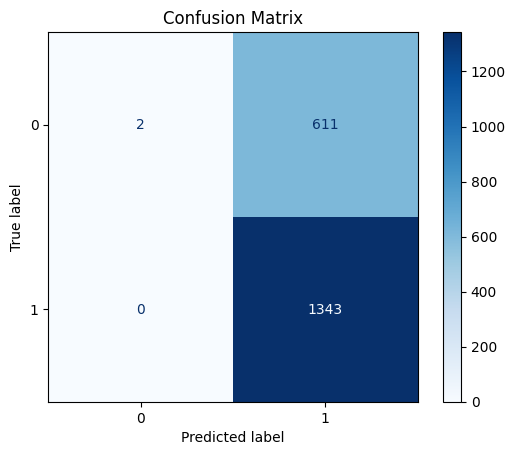

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    precision_recall_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("PuppetScripts_starcoder.csv")

# Drop rows with missing values
df = df.dropna(subset=['verification', 'Misconfiguration_Label_llm'])

# Convert columns to numeric (if needed)
df['verification'] = pd.to_numeric(df['verification'], errors='coerce')
df['Misconfiguration_Label_llm'] = pd.to_numeric(df['Misconfiguration_Label_llm'], errors='coerce')

# Drop rows with NaNs after conversion
df = df.dropna(subset=['verification', 'Misconfiguration_Label_llm'])

# Define true and predicted labels
true_labels = df['verification']
predicted_labels = df['Misconfiguration_Label_llm']

# Compute classification metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels,
    predicted_labels,
    average='binary',
    pos_label=1,
    zero_division=0
)

# Compute ROC AUC if both classes are present
try:
    roc_auc = roc_auc_score(true_labels, predicted_labels)
except ValueError:
    roc_auc = None

# Compute Precision-Recall AUC
precision_vals, recall_vals, _ = precision_recall_curve(true_labels, predicted_labels)
pr_auc = auc(recall_vals, precision_vals)

# Print the evaluation metrics
print(f"Accuracy             : {accuracy:.4f}")
print(f"Precision            : {precision:.4f}")
print(f"Recall               : {recall:.4f}")
print(f"F1-Score             : {f1:.4f}")
if roc_auc is not None:
    print(f"ROC AUC              : {roc_auc:.4f}")
else:
    print("ROC AUC              : Undefined (only one class in true labels)")
print(f"Precision-Recall AUC : {pr_auc:.4f}")

# Show confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

